In [108]:
import numpy as np
import pandas as pd
import pyarrow
import matplotlib.pyplot as plt

In [109]:
df_agents = pd.read_parquet('dataset/nus_agent_info_df.parquet')
df_agents.head(5)

,agntnum,agent_age,agent_gender,agent_marital,agent_tenure,cnt_converted,annual_premium_cnvrt,pct_lapsed,pct_cancel,pct_inforce,...,pct_AG03_25to29,pct_AG04_30to34,pct_AG05_35to39,pct_AG06_40to44,pct_AG07_45to49,pct_AG08_50to54,pct_AG09_55to59,pct_AG10_60up,cluster,agent_product_expertise
0,AIN:9513,32.0,M,M,15.0,21.0,1.004900e+04,1.0,0.814954,0.000000,...,0.142857,0.000000,0.000000,0.000000,0.000000,0.238095,0.142857,0.238095,3,"[prod_2, prod_6]"
1,AIN:4310,40.0,M,M,18.0,396.0,1.971080e+05,0.6,0.083937,0.429293,...,0.131313,0.388889,0.116162,0.184343,0.083333,0.020202,0.040404,0.010101,6,[prod_6]
2,AIN:4302,39.0,F,M,40.0,853.0,5.106351e+05,0.3,0.017406,0.711606,...,0.137163,0.144197,0.177022,0.311841,0.106682,0.036342,0.035170,0.010551,6,[prod_4]
3,AIN:4996,57.0,F,D,41.0,554.0,3.514724e+05,0.3,0.003623,0.584838,...,0.009025,0.128159,0.108303,0.234657,0.162455,0.135379,0.160650,0.037906,6,"[prod_7, prod_9, prod_6, prod_0, prod_2]"
4,AIN:3457,38.0,M,M,62.0,1525.0,1.215380e+06,0.3,0.017523,0.640656,...,0.069508,0.201311,0.215082,0.214426,0.108197,0.084590,0.043279,0.015082,6,"[prod_6, prod_8]"


In [110]:
df_clients = pd.read_parquet('dataset/nus_client_info_df.parquet')
df_clients.head(5)

,secuityno,cltsex,cltdob,marryd,race_desc_map,cltpcode,household_size,economic_status,family_size,household_size_grp,family_size_grp
0,CIN:14264,F,1993-02-17,M,Chinese,545686,1,76,56,HH1_lt40,FS3_40to60
1,CIN:7188,F,1977-06-15,M,Chinese,308364,72,96,90,HH2_40to80,FS5_80up
2,CIN:13608,F,1998-02-12,S,Chinese,387393,28,93,23,HH1_lt40,FS2_20to40
3,CIN:5087,F,1972-10-25,M,Chinese,640469,84,51,34,HH3_80to100,FS2_20to40
4,CIN:18531,M,1984-12-27,M,Others,763318,92,18,73,HH3_80to100,FS4_60to80


In [111]:
df_policies = pd.read_parquet('dataset/nus_policy_info_df.parquet')
df_policies.head(5)

,chdrnum,agntnum,secuityno,occdate,annual_premium,product,flg_main,flg_rider,flg_inforce,flg_lapsed,flg_cancel,flg_expire,flg_converted,product_grp,cust_age_at_purchase_grp,cust_tenure_at_purchase_grp
0,PID:281,AIN:62,CIN:6957,2018-11-12,0.0,prod_8,1,0,1,0,0,0,1,PG:0,AG05_35to39,TNR2_lt1yr
1,PID:280,AIN:63,CIN:2161,2024-02-22,7.0,prod_8,1,0,1,0,0,0,1,PG:0,AG04_30to34,TNR4_4to8yr
2,PID:2577,AIN:63,CIN:16605,2024-08-28,423.0,prod_6,1,0,1,0,0,0,1,PG:0,AG08_50to54,TNR5_8yrup
3,PID:2578,AIN:63,CIN:16605,2024-08-27,217.0,prod_6,1,0,1,0,0,0,1,PG:0,AG08_50to54,TNR5_8yrup
4,PID:305,AIN:63,CIN:7917,2024-08-28,432.0,prod_6,1,0,1,0,0,0,1,PG:0,AG07_45to49,TNR4_4to8yr


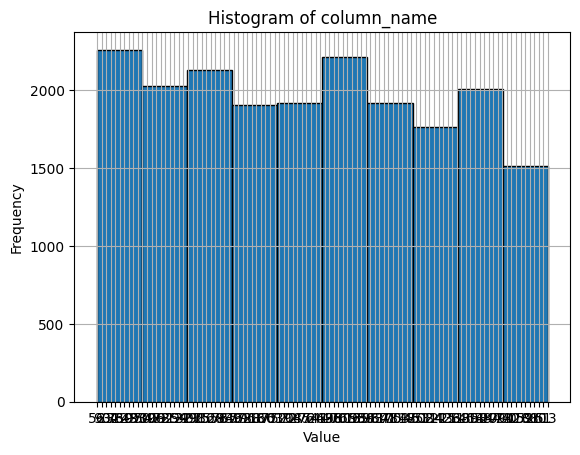

In [112]:
# Assuming your DataFrame is named 'df' and the column of interest is 'column_name'
df_clients['family_size'].hist(edgecolor='black')

# Add title and labels
plt.title('Histogram of column_name')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [113]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   secuityno           20000 non-null  object        
 1   cltsex              20000 non-null  object        
 2   cltdob              19994 non-null  datetime64[ns]
 3   marryd              20000 non-null  object        
 4   race_desc_map       19990 non-null  object        
 5   cltpcode            19844 non-null  object        
 6   household_size      19657 non-null  object        
 7   economic_status     19657 non-null  object        
 8   family_size         19657 non-null  object        
 9   household_size_grp  20000 non-null  object        
 10  family_size_grp     20000 non-null  object        
dtypes: datetime64[ns](1), object(10)
memory usage: 1.7+ MB


In [114]:
df_clients.isna().sum()

secuityno               0
cltsex                  0
cltdob                  6
marryd                  0
race_desc_map          10
cltpcode              156
household_size        343
economic_status       343
family_size           343
household_size_grp      0
family_size_grp         0
dtype: int64

In [115]:
df_clients['household_size'].unique()

array(['1', '72', '28', '84', '92', '109', '112', '129', '89', '60', '10',
       '149', '288', '135', '8', '86', '85', '88', '19', '234', '20',
       '127', '98', '15', '164', '71', '22', '47', '54', '30', '107',
       '52', '41', '244', '121', '46', '80', '99', '82', '113', '87',
       '74', '236', '136', '167', '219', '58', '39', '142', '27', '154',
       '434', '156', '185', '33', '93', '144', '73', '96', '141', '147',
       '108', '310', '66', None, '81', '168', '337', '220', '104', '139',
       '122', '36', '134', '158', '106', '233', '91', '140', '163', '17',
       '115', '57', '51', '44', '101', '62', '188', '111', '438', '110',
       '83', '143', '70', '69', '280', '68', '262', '77', '78', '21',
       '29', '119', '209', '76', '6', '75', '97', '191', '264', '67',
       '114', '90', '151', '131', '148', '132', '198', '150', '137',
       '130', '166', '348', '94', '133', '55', '193', '192', '152', '138',
       '105', '95', '176', '162', '439', '200', '174', '195', '5

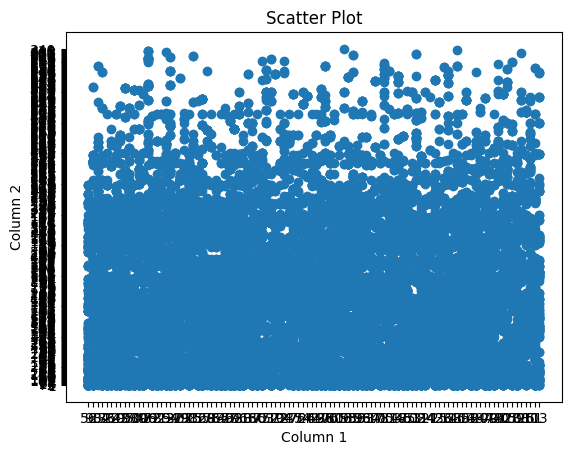

In [116]:
plt.scatter(df_clients['family_size'].dropna(), df_clients['household_size'].dropna())
plt.title('Scatter Plot')
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.show()

# Data Cleaning & Transformation 

In [117]:
# Change Data Types
df_clients['family_size'] = df_clients['family_size'].astype('Int64')
df_clients['economic_status'] = df_clients['economic_status'].astype('Int64')
df_clients['household_size'] = df_clients['household_size'].astype('Int64')


In [118]:
# Check na values
df_clients.isna().sum()

secuityno               0
cltsex                  0
cltdob                  6
marryd                  0
race_desc_map          10
cltpcode              156
household_size        343
economic_status       343
family_size           343
household_size_grp      0
family_size_grp         0
dtype: int64

In [119]:
df_na_rows = df_clients[df_clients.isna().any(axis=1)]
df_na_rows

,secuityno,cltsex,cltdob,marryd,race_desc_map,cltpcode,household_size,economic_status,family_size,household_size_grp,family_size_grp
93,CIN:12230,F,1972-08-01,M,Chinese,None,<NA>,<NA>,<NA>,HH0_missing,FS0_missing
156,CIN:4195,M,1988-07-30,S,Chinese,None,<NA>,<NA>,<NA>,HH0_missing,FS0_missing
220,CIN:15756,M,1984-03-07,M,Chinese,999888,<NA>,<NA>,<NA>,HH0_missing,FS0_missing
309,CIN:8171,,NaT,,None,068805,0,97,28,HH1_lt40,FS2_20to40
313,CIN:9746,F,1958-11-28,S,Chinese,None,<NA>,<NA>,<NA>,HH0_missing,FS0_missing
...,...,...,...,...,...,...,...,...,...,...,...
19689,CIN:19213,F,1970-05-17,M,Chinese,None,<NA>,<NA>,<NA>,HH0_missing,FS0_missing
19700,CIN:10481,M,1970-07-10,M,Chinese,999888,<NA>,<NA>,<NA>,HH0_missing,FS0_missing
19870,CIN:18260,M,1975-01-07,S,Chinese,None,<NA>,<NA>,<NA>,HH0_missing,FS0_missing
19915,CIN:4557,M,1974-01-17,M,Others,None,<NA>,<NA>,<NA>,HH0_missing,FS0_missing


In [120]:
# Remove invalid postal code data
df_clients = df_clients[df_clients['cltpcode'] <= '900000']
df_clients
# Removed 323 rows

,secuityno,cltsex,cltdob,marryd,race_desc_map,cltpcode,household_size,economic_status,family_size,household_size_grp,family_size_grp
0,CIN:14264,F,1993-02-17,M,Chinese,545686,1,76,56,HH1_lt40,FS3_40to60
1,CIN:7188,F,1977-06-15,M,Chinese,308364,72,96,90,HH2_40to80,FS5_80up
2,CIN:13608,F,1998-02-12,S,Chinese,387393,28,93,23,HH1_lt40,FS2_20to40
3,CIN:5087,F,1972-10-25,M,Chinese,640469,84,51,34,HH3_80to100,FS2_20to40
4,CIN:18531,M,1984-12-27,M,Others,763318,92,18,73,HH3_80to100,FS4_60to80
...,...,...,...,...,...,...,...,...,...,...,...
19995,CIN:14716,M,1983-05-12,M,Chinese,533870,75,86,42,HH2_40to80,FS3_40to60
19996,CIN:3133,M,1967-09-29,M,Chinese,643680,116,5,84,HH4_100to120,FS5_80up
19997,CIN:2389,M,1974-12-22,M,Chinese,737894,21,0,99,HH1_lt40,FS5_80up
19998,CIN:13133,M,1985-08-07,M,Chinese,589650,21,95,92,HH1_lt40,FS5_80up


In [121]:
# Remove missing data for DOB, Race
df_clients = df_clients.dropna(subset=['cltdob', 'race_desc_map'])
df_clients

# Removed 10 rows

,secuityno,cltsex,cltdob,marryd,race_desc_map,cltpcode,household_size,economic_status,family_size,household_size_grp,family_size_grp
0,CIN:14264,F,1993-02-17,M,Chinese,545686,1,76,56,HH1_lt40,FS3_40to60
1,CIN:7188,F,1977-06-15,M,Chinese,308364,72,96,90,HH2_40to80,FS5_80up
2,CIN:13608,F,1998-02-12,S,Chinese,387393,28,93,23,HH1_lt40,FS2_20to40
3,CIN:5087,F,1972-10-25,M,Chinese,640469,84,51,34,HH3_80to100,FS2_20to40
4,CIN:18531,M,1984-12-27,M,Others,763318,92,18,73,HH3_80to100,FS4_60to80
...,...,...,...,...,...,...,...,...,...,...,...
19995,CIN:14716,M,1983-05-12,M,Chinese,533870,75,86,42,HH2_40to80,FS3_40to60
19996,CIN:3133,M,1967-09-29,M,Chinese,643680,116,5,84,HH4_100to120,FS5_80up
19997,CIN:2389,M,1974-12-22,M,Chinese,737894,21,0,99,HH1_lt40,FS5_80up
19998,CIN:13133,M,1985-08-07,M,Chinese,589650,21,95,92,HH1_lt40,FS5_80up


In [122]:
# Convert DOB to age
df_clients['age'] = 2025 - df_clients['cltdob'].dt.year
df_clients

/var/folders/xf/v125knts0p57cdp0hhtgh8y00000gn/T/ipykernel_51156/4276822144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clients['age'] = 2025 - df_clients['cltdob'].dt.year


,secuityno,cltsex,cltdob,marryd,race_desc_map,cltpcode,household_size,economic_status,family_size,household_size_grp,family_size_grp,age
0,CIN:14264,F,1993-02-17,M,Chinese,545686,1,76,56,HH1_lt40,FS3_40to60,32
1,CIN:7188,F,1977-06-15,M,Chinese,308364,72,96,90,HH2_40to80,FS5_80up,48
2,CIN:13608,F,1998-02-12,S,Chinese,387393,28,93,23,HH1_lt40,FS2_20to40,27
3,CIN:5087,F,1972-10-25,M,Chinese,640469,84,51,34,HH3_80to100,FS2_20to40,53
4,CIN:18531,M,1984-12-27,M,Others,763318,92,18,73,HH3_80to100,FS4_60to80,41
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,CIN:14716,M,1983-05-12,M,Chinese,533870,75,86,42,HH2_40to80,FS3_40to60,42
19996,CIN:3133,M,1967-09-29,M,Chinese,643680,116,5,84,HH4_100to120,FS5_80up,58
19997,CIN:2389,M,1974-12-22,M,Chinese,737894,21,0,99,HH1_lt40,FS5_80up,51
19998,CIN:13133,M,1985-08-07,M,Chinese,589650,21,95,92,HH1_lt40,FS5_80up,40


In [123]:
# Remove missing data for economic_status, family_size
df_clients = df_clients.dropna(subset=['economic_status'])
df_clients

# Removed 20 rows

,secuityno,cltsex,cltdob,marryd,race_desc_map,cltpcode,household_size,economic_status,family_size,household_size_grp,family_size_grp,age
0,CIN:14264,F,1993-02-17,M,Chinese,545686,1,76,56,HH1_lt40,FS3_40to60,32
1,CIN:7188,F,1977-06-15,M,Chinese,308364,72,96,90,HH2_40to80,FS5_80up,48
2,CIN:13608,F,1998-02-12,S,Chinese,387393,28,93,23,HH1_lt40,FS2_20to40,27
3,CIN:5087,F,1972-10-25,M,Chinese,640469,84,51,34,HH3_80to100,FS2_20to40,53
4,CIN:18531,M,1984-12-27,M,Others,763318,92,18,73,HH3_80to100,FS4_60to80,41
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,CIN:14716,M,1983-05-12,M,Chinese,533870,75,86,42,HH2_40to80,FS3_40to60,42
19996,CIN:3133,M,1967-09-29,M,Chinese,643680,116,5,84,HH4_100to120,FS5_80up,58
19997,CIN:2389,M,1974-12-22,M,Chinese,737894,21,0,99,HH1_lt40,FS5_80up,51
19998,CIN:13133,M,1985-08-07,M,Chinese,589650,21,95,92,HH1_lt40,FS5_80up,40


In [124]:
# Rename secuityno to securityno
df_clients = df_clients.rename(columns={'secuityno': 'securityno'})
df_clients

,securityno,cltsex,cltdob,marryd,race_desc_map,cltpcode,household_size,economic_status,family_size,household_size_grp,family_size_grp,age
0,CIN:14264,F,1993-02-17,M,Chinese,545686,1,76,56,HH1_lt40,FS3_40to60,32
1,CIN:7188,F,1977-06-15,M,Chinese,308364,72,96,90,HH2_40to80,FS5_80up,48
2,CIN:13608,F,1998-02-12,S,Chinese,387393,28,93,23,HH1_lt40,FS2_20to40,27
3,CIN:5087,F,1972-10-25,M,Chinese,640469,84,51,34,HH3_80to100,FS2_20to40,53
4,CIN:18531,M,1984-12-27,M,Others,763318,92,18,73,HH3_80to100,FS4_60to80,41
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,CIN:14716,M,1983-05-12,M,Chinese,533870,75,86,42,HH2_40to80,FS3_40to60,42
19996,CIN:3133,M,1967-09-29,M,Chinese,643680,116,5,84,HH4_100to120,FS5_80up,58
19997,CIN:2389,M,1974-12-22,M,Chinese,737894,21,0,99,HH1_lt40,FS5_80up,51
19998,CIN:13133,M,1985-08-07,M,Chinese,589650,21,95,92,HH1_lt40,FS5_80up,40


In [125]:
# Fix the household_group, family_size_grp for CIN:11715
df_clients.loc[df_clients['securityno'] == 'CIN:11715', 'household_size_grp'] = 'HH3_80to100'
df_clients.loc[df_clients['securityno'] == 'CIN:11715', 'family_size_grp'] = 'FS4_60to80'
df_clients

,securityno,cltsex,cltdob,marryd,race_desc_map,cltpcode,household_size,economic_status,family_size,household_size_grp,family_size_grp,age
0,CIN:14264,F,1993-02-17,M,Chinese,545686,1,76,56,HH1_lt40,FS3_40to60,32
1,CIN:7188,F,1977-06-15,M,Chinese,308364,72,96,90,HH2_40to80,FS5_80up,48
2,CIN:13608,F,1998-02-12,S,Chinese,387393,28,93,23,HH1_lt40,FS2_20to40,27
3,CIN:5087,F,1972-10-25,M,Chinese,640469,84,51,34,HH3_80to100,FS2_20to40,53
4,CIN:18531,M,1984-12-27,M,Others,763318,92,18,73,HH3_80to100,FS4_60to80,41
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,CIN:14716,M,1983-05-12,M,Chinese,533870,75,86,42,HH2_40to80,FS3_40to60,42
19996,CIN:3133,M,1967-09-29,M,Chinese,643680,116,5,84,HH4_100to120,FS5_80up,58
19997,CIN:2389,M,1974-12-22,M,Chinese,737894,21,0,99,HH1_lt40,FS5_80up,51
19998,CIN:13133,M,1985-08-07,M,Chinese,589650,21,95,92,HH1_lt40,FS5_80up,40


In [126]:
# Map income groups 

income_mapping = {
    'HH1_lt40': 1,
    'HH2_40to80': 2,
    'HH3_80to100': 3,
    'HH4_100to120': 4,
    'HH5_120up': 5
}

df_clients['household_size_grp'] = df_clients['household_size_grp'].map(income_mapping)
df_clients

,securityno,cltsex,cltdob,marryd,race_desc_map,cltpcode,household_size,economic_status,family_size,household_size_grp,family_size_grp,age
0,CIN:14264,F,1993-02-17,M,Chinese,545686,1,76,56,1,FS3_40to60,32
1,CIN:7188,F,1977-06-15,M,Chinese,308364,72,96,90,2,FS5_80up,48
2,CIN:13608,F,1998-02-12,S,Chinese,387393,28,93,23,1,FS2_20to40,27
3,CIN:5087,F,1972-10-25,M,Chinese,640469,84,51,34,3,FS2_20to40,53
4,CIN:18531,M,1984-12-27,M,Others,763318,92,18,73,3,FS4_60to80,41
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,CIN:14716,M,1983-05-12,M,Chinese,533870,75,86,42,2,FS3_40to60,42
19996,CIN:3133,M,1967-09-29,M,Chinese,643680,116,5,84,4,FS5_80up,58
19997,CIN:2389,M,1974-12-22,M,Chinese,737894,21,0,99,1,FS5_80up,51
19998,CIN:13133,M,1985-08-07,M,Chinese,589650,21,95,92,1,FS5_80up,40


In [127]:
# Map family size groups 

family_mapping = {
    'FS1_lt20': 1,
    'FS2_20to40': 2,
    'FS3_40to60': 3,
    'FS4_60to80': 4,
    'FS5_80up': 5
}


df_clients['family_size_grp'] = df_clients['family_size_grp'].map(family_mapping)
df_clients

,securityno,cltsex,cltdob,marryd,race_desc_map,cltpcode,household_size,economic_status,family_size,household_size_grp,family_size_grp,age
0,CIN:14264,F,1993-02-17,M,Chinese,545686,1,76,56,1,3,32
1,CIN:7188,F,1977-06-15,M,Chinese,308364,72,96,90,2,5,48
2,CIN:13608,F,1998-02-12,S,Chinese,387393,28,93,23,1,2,27
3,CIN:5087,F,1972-10-25,M,Chinese,640469,84,51,34,3,2,53
4,CIN:18531,M,1984-12-27,M,Others,763318,92,18,73,3,4,41
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,CIN:14716,M,1983-05-12,M,Chinese,533870,75,86,42,2,3,42
19996,CIN:3133,M,1967-09-29,M,Chinese,643680,116,5,84,4,5,58
19997,CIN:2389,M,1974-12-22,M,Chinese,737894,21,0,99,1,5,51
19998,CIN:13133,M,1985-08-07,M,Chinese,589650,21,95,92,1,5,40


In [128]:
# Remove customer with marital status as P
df_clients = df_clients[df_clients['marryd'] != 'P']
df_clients
# Removed 1 row

,securityno,cltsex,cltdob,marryd,race_desc_map,cltpcode,household_size,economic_status,family_size,household_size_grp,family_size_grp,age
0,CIN:14264,F,1993-02-17,M,Chinese,545686,1,76,56,1,3,32
1,CIN:7188,F,1977-06-15,M,Chinese,308364,72,96,90,2,5,48
2,CIN:13608,F,1998-02-12,S,Chinese,387393,28,93,23,1,2,27
3,CIN:5087,F,1972-10-25,M,Chinese,640469,84,51,34,3,2,53
4,CIN:18531,M,1984-12-27,M,Others,763318,92,18,73,3,4,41
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,CIN:14716,M,1983-05-12,M,Chinese,533870,75,86,42,2,3,42
19996,CIN:3133,M,1967-09-29,M,Chinese,643680,116,5,84,4,5,58
19997,CIN:2389,M,1974-12-22,M,Chinese,737894,21,0,99,1,5,51
19998,CIN:13133,M,1985-08-07,M,Chinese,589650,21,95,92,1,5,40


In [129]:
# Remove columns
df_clients.drop(['cltdob', 'race_desc_map'], axis=1, inplace=True)
df_clients


/var/folders/xf/v125knts0p57cdp0hhtgh8y00000gn/T/ipykernel_51156/2212942240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clients.drop(['cltdob', 'race_desc_map'], axis=1, inplace=True)


,securityno,cltsex,marryd,cltpcode,household_size,economic_status,family_size,household_size_grp,family_size_grp,age
0,CIN:14264,F,M,545686,1,76,56,1,3,32
1,CIN:7188,F,M,308364,72,96,90,2,5,48
2,CIN:13608,F,S,387393,28,93,23,1,2,27
3,CIN:5087,F,M,640469,84,51,34,3,2,53
4,CIN:18531,M,M,763318,92,18,73,3,4,41
...,...,...,...,...,...,...,...,...,...,...
19995,CIN:14716,M,M,533870,75,86,42,2,3,42
19996,CIN:3133,M,M,643680,116,5,84,4,5,58
19997,CIN:2389,M,M,737894,21,0,99,1,5,51
19998,CIN:13133,M,M,589650,21,95,92,1,5,40


In [130]:
# Map marriage status
wedding = {
    'S': 1,
    'M': 2,
    'W': 3,
    'D': 4,
    'U': 5
}

df_clients['marryd'] = df_clients['marryd'].map(wedding)
df_clients

/var/folders/xf/v125knts0p57cdp0hhtgh8y00000gn/T/ipykernel_51156/4105475369.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clients['marryd'] = df_clients['marryd'].map(wedding)


,securityno,cltsex,marryd,cltpcode,household_size,economic_status,family_size,household_size_grp,family_size_grp,age
0,CIN:14264,F,2,545686,1,76,56,1,3,32
1,CIN:7188,F,2,308364,72,96,90,2,5,48
2,CIN:13608,F,1,387393,28,93,23,1,2,27
3,CIN:5087,F,2,640469,84,51,34,3,2,53
4,CIN:18531,M,2,763318,92,18,73,3,4,41
...,...,...,...,...,...,...,...,...,...,...
19995,CIN:14716,M,2,533870,75,86,42,2,3,42
19996,CIN:3133,M,2,643680,116,5,84,4,5,58
19997,CIN:2389,M,2,737894,21,0,99,1,5,51
19998,CIN:13133,M,2,589650,21,95,92,1,5,40


In [141]:
# Map postal codes
postal_districts = {'01': '01', '02': '01', '03': '01', '04': '01', '05': '01', '06': '01', '07': '02', '08': '02', '14': '03', '15': '03', '16': '03', '09': '04', '10': '04', '11': '05', '12': '05', '13': '05', '17': '06', '18': '07', '19': '07', '20': '08', '21': '08', '22': '09', '23': '09', '24': '10', '25': '10', '26': '10', '27': '10', '28': '11', '29': '11', '30': '11', '31': '12', '32': '12', '33': '12', '34': '13', '35': '13', '36': '13', '37': '13', '38': '14', '39': '14', '40': '14', '41': '14', '42': '15', '43': '15', '44': '15', '45': '15', '46': '16', '47': '16', '48': '16', '49': '17', '50': '17', '81': '17', '51': '18', '52': '18', '53': '19', '54': '19', '55': '19', '82': '19', '56': '20', '57': '20', '58': '21', '59': '21', '60': '22', '61': '22', '62': '22', '63': '22', '64': '22', '65': '23', '66': '23', '67': '23', '68': '23', '69': '24', '70': '24', '71': '24', '72': '25', '73': '25', '77': '26', '78': '26', '75': '27', '76': '27', '79': '28', '80': '28'}

# # Convert the postal code to an integer, then extract the first two digits
# df_clients['cltpcode'] = df_clients['cltpcode'].astype(int)

# # Extract the first two digits by integer division
# df_clients['district_code'] = df_clients['cltpcode'] // 10000
# df_clients['district_code'] = df_clients['district_code'].astype(str)

# # Map the district code to the corresponding district
# df_clients['district'] = df_clients['district_code'].map(postal_districts)
df_clients['district'] = df_clients['cltpcode'].str[:2].map(postal_districts)
df_clients

/var/folders/xf/v125knts0p57cdp0hhtgh8y00000gn/T/ipykernel_51156/1779762125.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clients['district'] = df_clients['cltpcode'].str[:2].map(postal_districts)


,securityno,cltsex,marryd,cltpcode,household_size,economic_status,family_size,household_size_grp,family_size_grp,age,district
0,CIN:14264,F,2,545686,1,76,56,1,3,32,19
1,CIN:7188,F,2,308364,72,96,90,2,5,48,11
2,CIN:13608,F,1,387393,28,93,23,1,2,27,14
3,CIN:5087,F,2,640469,84,51,34,3,2,53,22
4,CIN:18531,M,2,763318,92,18,73,3,4,41,27
...,...,...,...,...,...,...,...,...,...,...,...
19995,CIN:14716,M,2,533870,75,86,42,2,3,42,19
19996,CIN:3133,M,2,643680,116,5,84,4,5,58,22
19997,CIN:2389,M,2,737894,21,0,99,1,5,51,25
19998,CIN:13133,M,2,589650,21,95,92,1,5,40,21


In [ ]:
df_district_means = df_clients.groupby('district')['economic_status'].mean().reset_index()
df_district_means

,district,economic_status
district,1.000000,-0.506592
economic_status,-0.506592,1.000000


In [ ]:
# Remove columns
df_clients.drop(['cltpcode', 'household_size', 'family_size'], axis=1, inplace=True)
df_clients

/var/folders/xf/v125knts0p57cdp0hhtgh8y00000gn/T/ipykernel_51156/1452085922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clients.drop(['family_size'], axis=1, inplace=True)


,securityno,cltsex,marryd,economic_status,household_size_grp,family_size_grp,age,district
0,CIN:14264,F,2,76,1,3,32,19
1,CIN:7188,F,2,96,2,5,48,11
2,CIN:13608,F,1,93,1,2,27,14
3,CIN:5087,F,2,51,3,2,53,22
4,CIN:18531,M,2,18,3,4,41,27
...,...,...,...,...,...,...,...,...
19995,CIN:14716,M,2,86,2,3,42,19
19996,CIN:3133,M,2,5,4,5,58,22
19997,CIN:2389,M,2,0,1,5,51,25
19998,CIN:13133,M,2,95,1,5,40,21


In [146]:
# Export data as csv
df_clients.to_csv('df_clients.csv', index=False)


In [134]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19646 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   securityno          19646 non-null  object
 1   cltsex              19646 non-null  object
 2   marryd              19646 non-null  int64 
 3   cltpcode            19646 non-null  object
 4   household_size      19646 non-null  Int64 
 5   economic_status     19646 non-null  Int64 
 6   family_size         19646 non-null  Int64 
 7   household_size_grp  19646 non-null  int64 
 8   family_size_grp     19646 non-null  int64 
 9   age                 19646 non-null  int32 
 10  district            19391 non-null  object
dtypes: Int64(3), int32(1), int64(3), object(4)
memory usage: 1.8+ MB
